In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [3]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [4]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'COMPAS'
EXPERIMENT_SESSION_UUID = '669042c2-9efe-44ca-8578-1716c7f8d2b4'
SENSITIVE_ATTRS = ['sex', 'race', 'sex&race']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']

In [5]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(1344, 25)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:50:54.992,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.712121,0.715170,0.707317,0.706320,0.723404,0.704918,0.742574
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:54:52.881,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.712121,0.715170,0.707317,0.706320,0.723404,0.704918,0.742574
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,1,OK,2023-04-23 20:50:55.002,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.710227,0.712074,0.707317,0.706320,0.723404,0.704918,0.732673
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,1,OK,2023-04-23 20:54:52.890,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.710227,0.712074,0.707317,0.706320,0.723404,0.704918,0.732673
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,2,OK,2023-04-23 20:50:55.014,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.706439,0.712074,0.697561,0.706320,0.723404,0.700234,0.732673
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,2,OK,2023-04-23 20:54:52.903,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.706439,0.712074,0.697561,0.706320,0.723404,0.700234,0.732673
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,3,OK,2023-04-23 20:50:55.026,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.678030,0.678019,0.678049,0.665428,0.702128,0.667447,0.722772
7,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,3,OK,2023-04-23 20:54:52.913,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.678030,0.678019,0.678049,0.665428,0.702128,0.667447,0.722772
8,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,4,OK,2023-04-23 20:50:55.039,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.647727,0.634675,0.668293,0.617100,0.702128,0.632319,0.712871
9,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,4,OK,2023-04-23 20:54:52.926,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.647727,0.634675,0.668293,0.617100,0.702128,0.632319,0.712871


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [11]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:54:52.881,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.712121,0.715170,0.707317,0.706320,0.723404,0.704918,0.742574
29,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:55:18.704,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.704545,0.705882,0.702439,0.698885,0.702128,0.700234,0.722772
57,Accuracy,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:55:48.842,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.708333,0.702786,0.717073,0.698885,0.723404,0.704918,0.722772
169,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:54:52.881,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.254779,0.277913,0.218329,0.000000,0.000000,0.266615,0.204737
197,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:55:18.704,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.267929,0.286901,0.238036,0.000000,0.000000,0.269983,0.259243
225,Entropy,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:55:48.842,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.313256,0.330767,0.285665,0.000000,0.250629,0.315567,0.303485
337,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:54:52.881,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.670996,0.719512,0.552239,0.730375,0.518519,0.685000,0.580645
365,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:55:18.704,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.682927,0.733894,0.548148,0.746082,0.500000,0.699531,0.575758
393,F1,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:55:48.842,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.669528,0.714286,0.553846,0.732673,0.518519,0.689655,0.533333
505,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:54:52.881,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.403846,0.325714,0.564706,0.300654,0.611111,0.377273,0.550000


In [12]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Dataset_Split_Seed,Model_Init_Seed,Injector_Config_Lst,overall,race_dis,race_priv,sex&race_dis,sex&race_priv,sex_dis,sex_priv
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:50:54.992,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.712121,0.715170,0.707317,0.706320,0.723404,0.704918,0.742574
28,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:51:20.816,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.704545,0.705882,0.702439,0.698885,0.702128,0.700234,0.722772
56,Accuracy,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:51:48.512,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.708333,0.702786,0.717073,0.698885,0.723404,0.704918,0.722772
168,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:50:54.992,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.254779,0.277913,0.218329,0.000000,0.000000,0.266615,0.204737
196,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:51:20.816,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.267929,0.286901,0.238036,0.000000,0.000000,0.269983,0.259243
224,Entropy,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:51:48.512,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.313256,0.330767,0.285665,0.000000,0.250629,0.315567,0.303485
336,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:50:54.992,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.670996,0.719512,0.552239,0.730375,0.518519,0.685000,0.580645
364,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,COMPAS,50,0,OK,2023-04-23 20:51:20.816,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.682927,0.733894,0.548148,0.746082,0.500000,0.699531,0.575758
392,F1,103,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_3,COMPAS,50,0,OK,2023-04-23 20:51:48.512,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.669528,0.714286,0.553846,0.732673,0.518519,0.689655,0.533333
504,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,COMPAS,50,0,OK,2023-04-23 20:50:54.992,...,100,100,"[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]",0.403846,0.325714,0.564706,0.300654,0.611111,0.377273,0.550000


In [13]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [14]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.8].head(100)

,Metric,sex,race,sex&race,Model_Name
0,Equalized_Odds_TPR,0.128788,0.227451,0.224401,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.174309,0.172222,0.272989,DecisionTreeClassifier
2,Disparate_Impact,1.662338,1.791644,2.033613,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.270455,0.329076,0.401961,DecisionTreeClassifier
4,Accuracy_Parity,-0.091057,-0.034056,-0.107543,DecisionTreeClassifier
5,Label_Stability_Ratio,0.969355,0.964532,0.875560,DecisionTreeClassifier
6,IQR_Parity,-0.016608,0.011265,0.002918,DecisionTreeClassifier
7,Std_Parity,-0.006334,0.007337,0.004789,DecisionTreeClassifier
8,Std_Ratio,0.930215,1.090403,1.058645,DecisionTreeClassifier
9,Jitter_Parity,0.019423,0.024681,0.077963,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [15]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [16]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.632611
1,Entropy,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.262619
2,F1,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.611171
3,FNR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.466667
4,FPR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,race_dis,0.250000
...,...,...,...,...,...,...,...,...
107,Positive-Rate,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.637179
108,Selection-Rate,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.313763
109,Std,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.085642
110,TNR,DecisionTreeClassifier,50.0,5.0,100.0,100.0,overall,0.827114


In [17]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.8].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,sex,0.128788
1,Equalized_Odds_FPR,DecisionTreeClassifier,sex,0.174309
2,Disparate_Impact,DecisionTreeClassifier,sex,1.662338
3,Statistical_Parity_Difference,DecisionTreeClassifier,sex,0.270455
4,Accuracy_Parity,DecisionTreeClassifier,sex,-0.091057
5,Label_Stability_Ratio,DecisionTreeClassifier,sex,0.969355
6,IQR_Parity,DecisionTreeClassifier,sex,-0.016608
7,Std_Parity,DecisionTreeClassifier,sex,-0.006334
8,Std_Ratio,DecisionTreeClassifier,sex,0.930215
9,Jitter_Parity,DecisionTreeClassifier,sex,0.019423


### Subgroup metrics per dataset, experiment iteration, and model

In [18]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [19]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [20]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [21]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [22]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [23]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [24]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [25]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [26]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

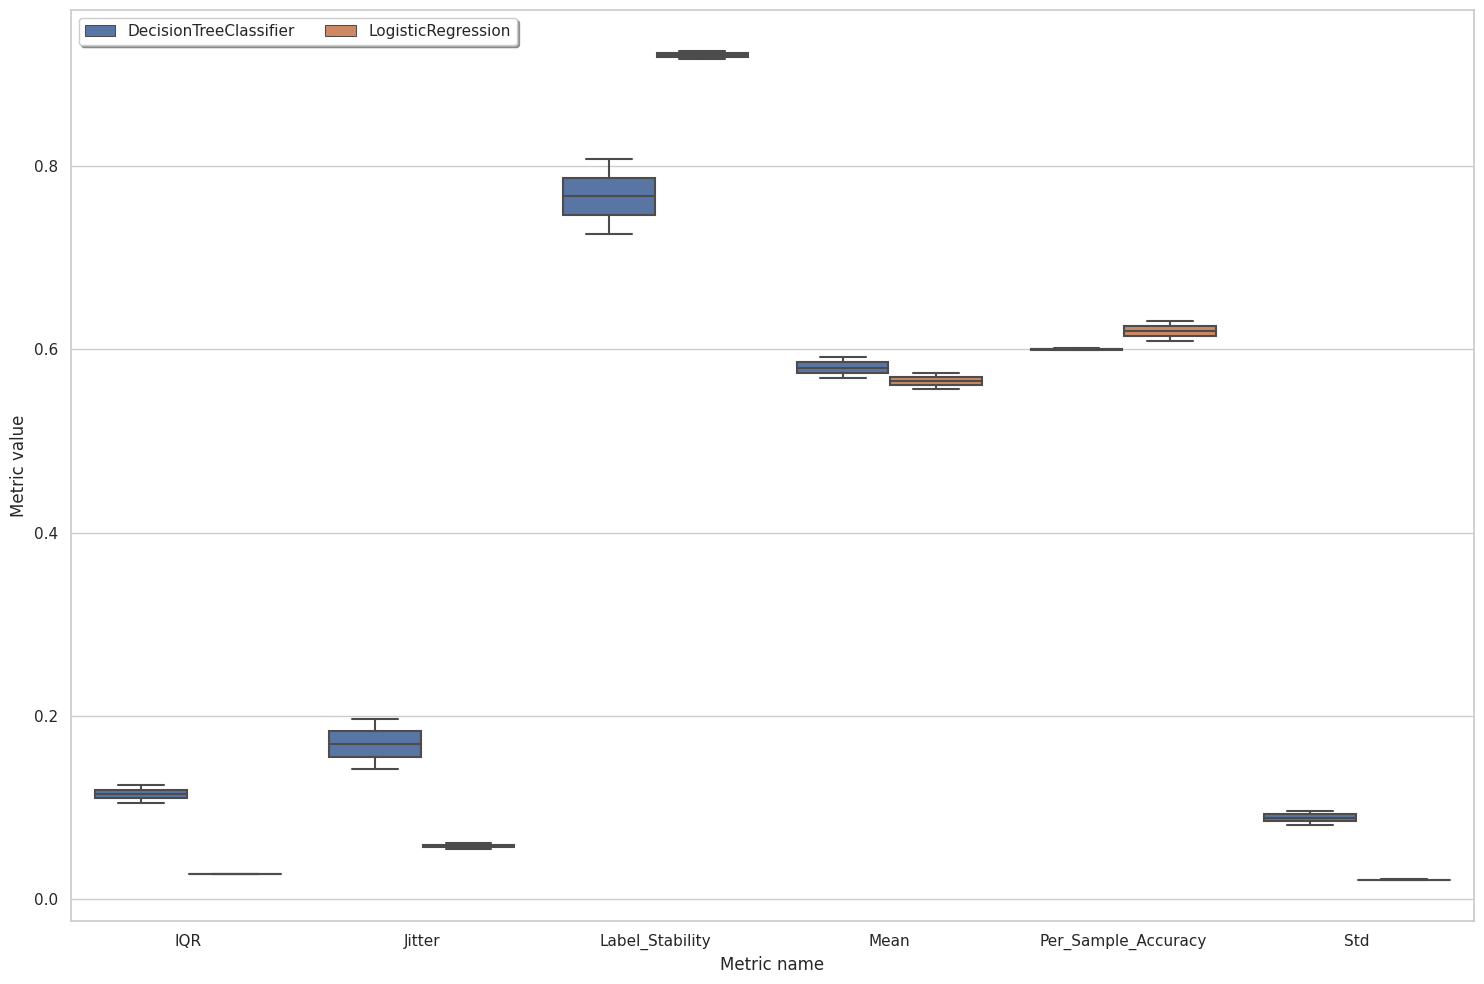

In [27]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

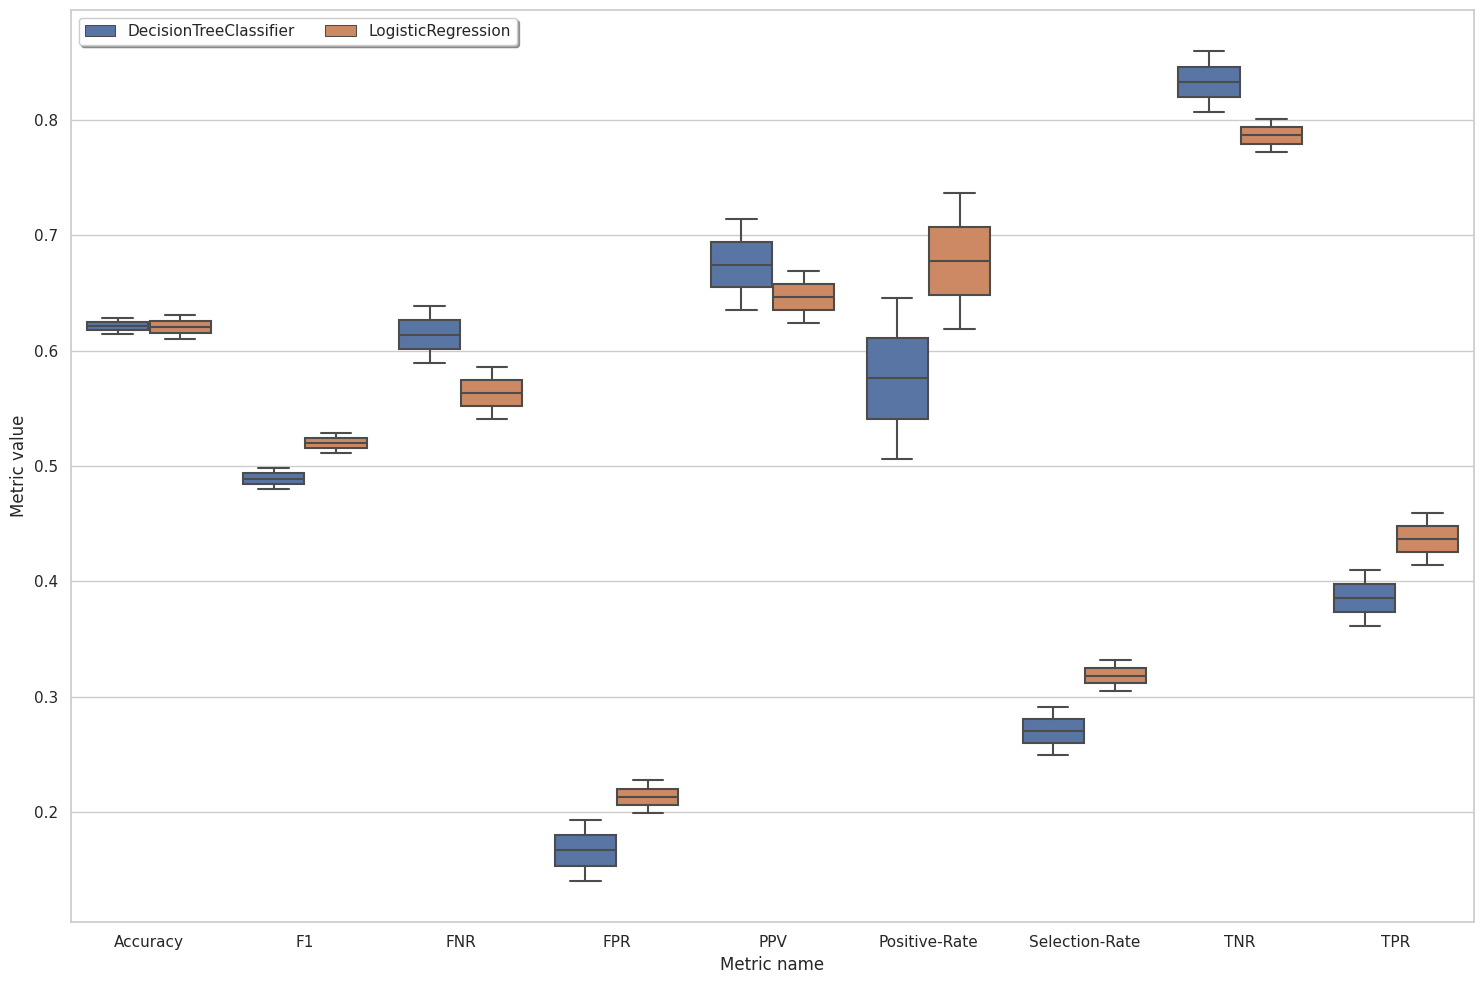

In [28]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=1.0,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

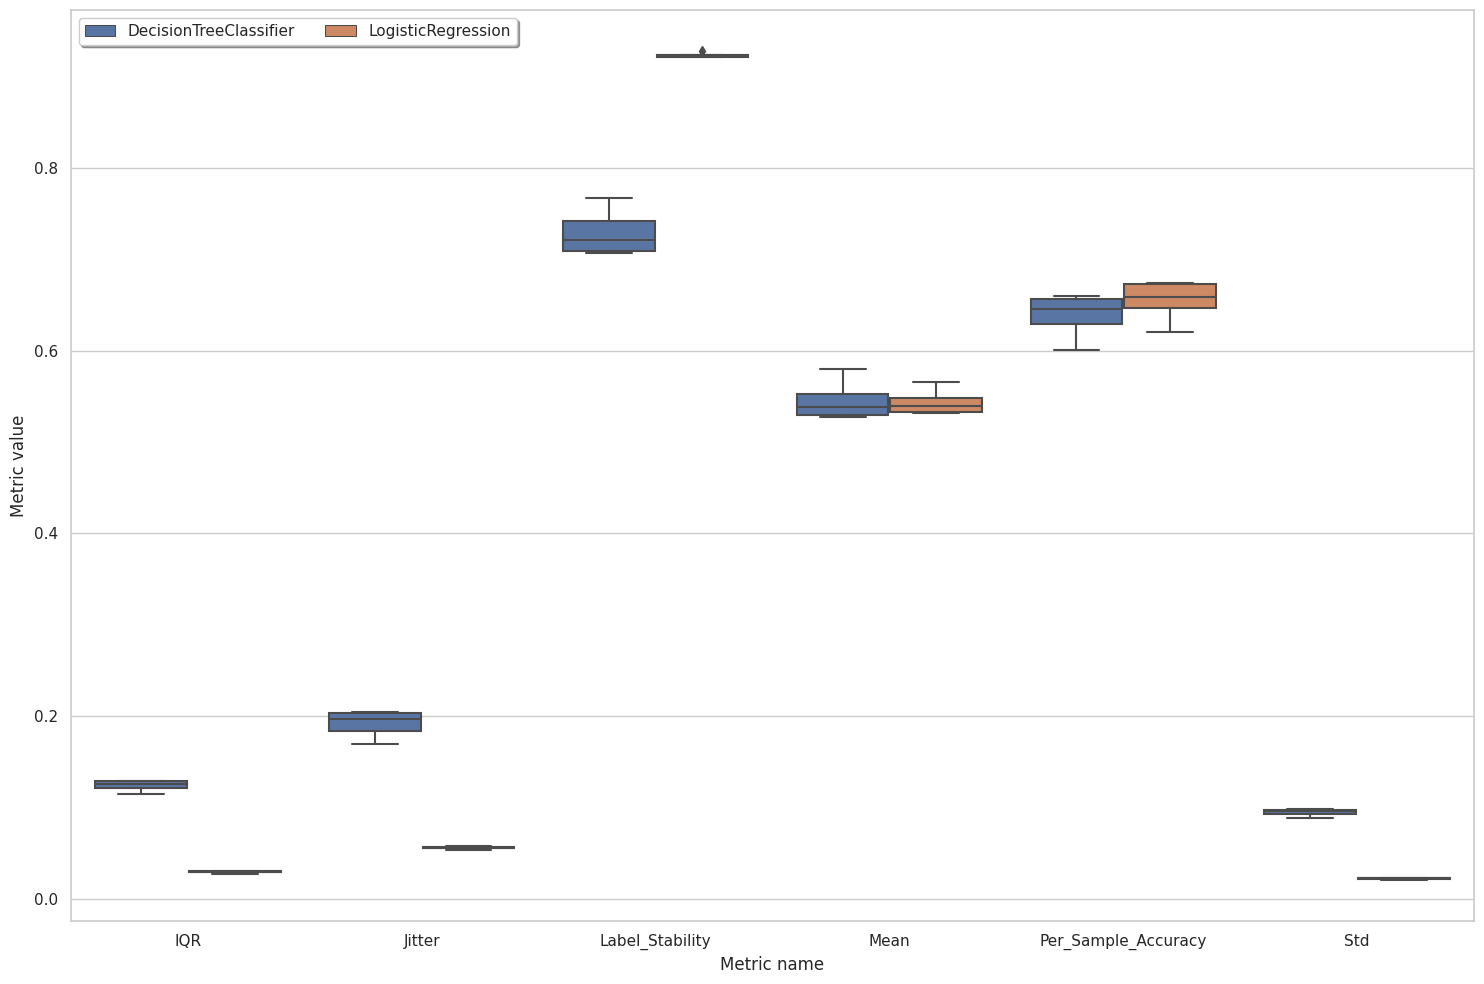

In [29]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

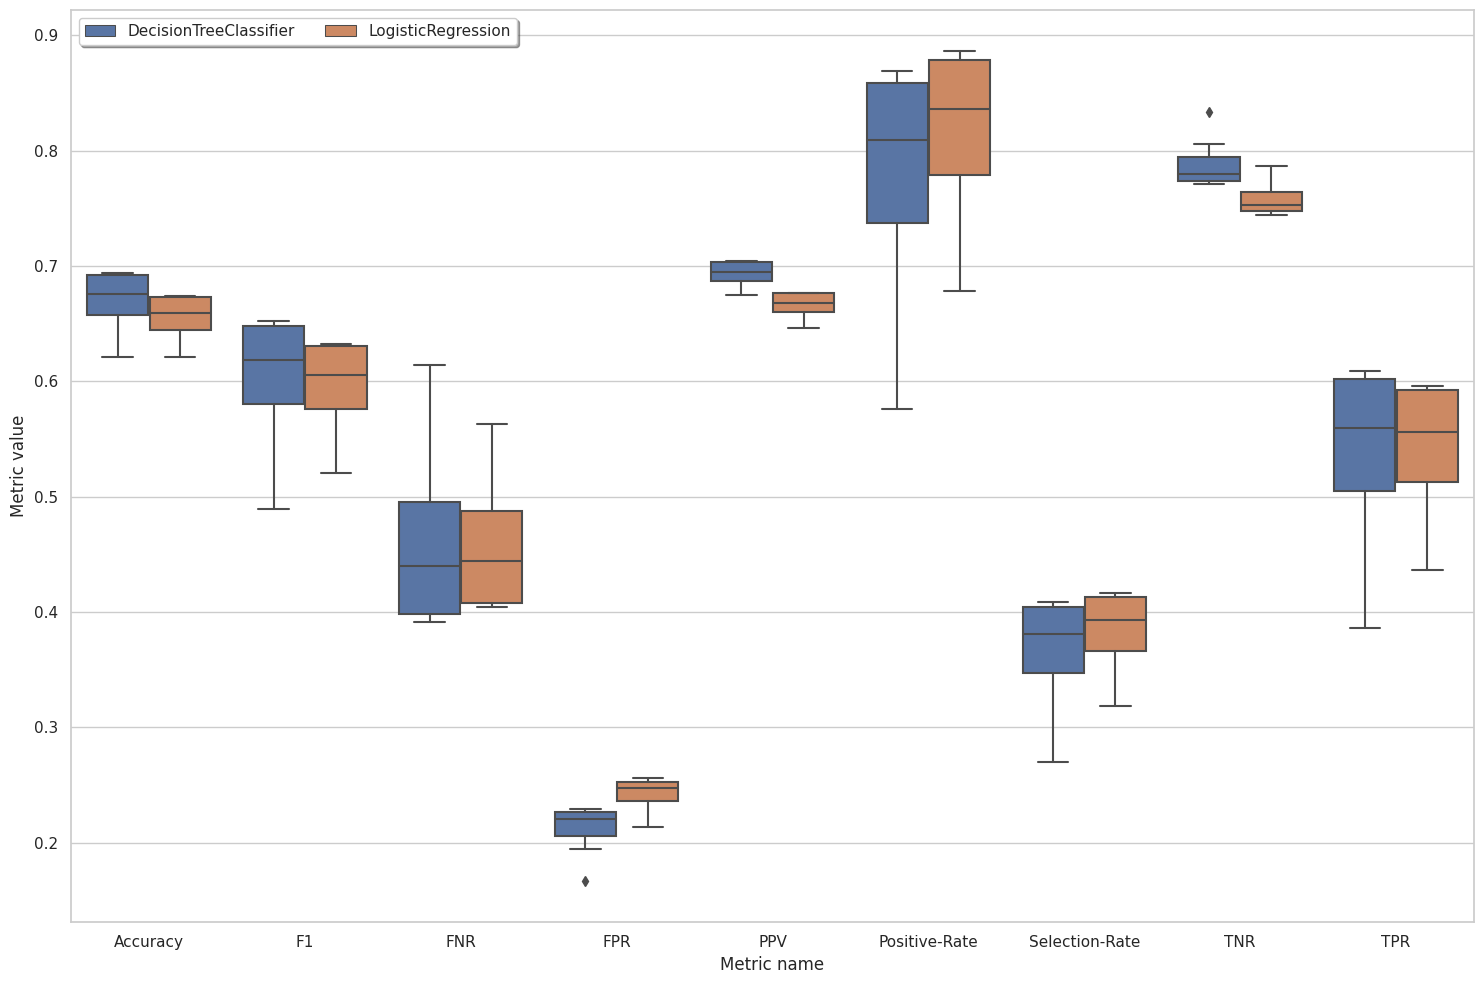

In [30]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='error')